In [125]:
import pandas as pd
df = pd.read_csv('titanic.csv')

In [126]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [127]:
target = df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [128]:
inputs = df.drop(['Survived','PassengerId','Parch','Ticket','Cabin','Embarked','SibSp','Name'],axis="columns")

In [129]:
inputs.head()

,Pclass,Sex,Age,Fare
0,3,male,22.0,7.2500
1,1,female,38.0,71.2833
2,3,female,26.0,7.9250
3,1,female,35.0,53.1000
4,3,male,35.0,8.0500


In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
le_age = LabelEncoder()
le_sex = LabelEncoder()

In [132]:
inputs_n = inputs.copy()

In [133]:
inputs_n['le_sex'] = le_age.fit_transform(inputs['Sex'])
inputs_n['le_age'] = le_age.fit_transform(inputs['Age'])
inputs_n  = inputs_n.drop(['Pclass','Sex','Age'],axis="columns")
inputs_n

,Fare,le_sex,le_age
0,7.2500,1,28
1,71.2833,0,51
2,7.9250,0,34
3,53.1000,0,47
4,8.0500,1,47
...,...,...,...
886,13.0000,1,35
887,30.0000,0,24
888,23.4500,0,88
889,30.0000,1,34


In [134]:
from sklearn import tree

In [135]:
model = tree.DecisionTreeClassifier()

In [136]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [137]:
model.score(inputs_n,target)

0.9797979797979798

In [138]:
model.predict([[40,1,80]])

array([0])

## train test split

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(inputs_n,target,test_size=0.4)

In [141]:
new_model = tree.DecisionTreeClassifier()

In [142]:
new_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [143]:
new_model.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,

In [144]:
from sklearn.metrics import confusion_matrix

Text(69.0, 0.5, 'Truth')

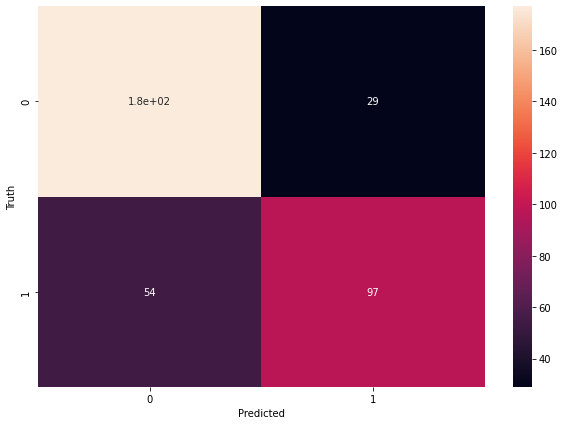

In [145]:
y_predicted = new_model.predict(X_test)
cm = confusion_matrix(y_test,y_predicted)
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [146]:
new_model.score(X_train,y_train)

0.9794007490636704

In [147]:
new_model.score(X_test,y_test)

0.7675070028011205